<a href="https://colab.research.google.com/github/MM21B060/Shyamapp/blob/main/PriceFinalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/price_final.csv')
price = pd.read_csv('/content/t1_prices.csv')
price = price.drop(columns='join_key')
print(data.isnull().sum())
print(data.shape[0])
data=data.drop(columns='join_key')
data=data.drop(columns='Name')
data=data.drop(columns='BSE Code')
data=data.drop(columns='NSE Code')
data=data.drop(columns='Industry')
data=data.drop(columns='Return over 1year')
data=data.drop(columns='Return over 3years')
data=data.drop(columns='Return over 5years')
data=data.drop(columns='Return over 7years')
data=data.drop(columns='Return over 10years')
new_data = pd.concat([data, price], axis=1)
new_data.dropna(inplace=True)

print(new_data.shape[0])
new_data.head()

Name                           0
BSE Code                       0
NSE Code                       0
Industry                       0
Current Price                  1
Return over 3months          105
Return over 6months          205
Volume 1month average          0
Volume 1week average           0
Volume                         0
High price                     5
Low price                      5
High price all time            5
Low price all time             5
Return over 1day               7
Return over 1week             17
Return over 1month            47
DMA 50                         5
DMA 200                        5
DMA 50 previous day            9
DMA 200 previous day           9
RSI                           34
MACD                           5
MACD Previous Day              9
MACD Signal                    5
MACD Signal Previous Day       9
Return over 1year            411
Return over 3years           844
Return over 5years          1113
Volume 1year average           0
Return ove

,Current Price,Return over 3months,Return over 6months,Volume 1month average,Volume 1week average,Volume,High price,Low price,High price all time,Low price all time,...,DMA 50 previous day,DMA 200 previous day,RSI,MACD,MACD Previous Day,MACD Signal,MACD Signal Previous Day,Volume 1year average,Market Capitalization,t_1_price
0,225.20,44.62,23.16,729846,816052,312746,234.94,90.00,234.94,6.60,...,180.47,157.09,69.23,12.82,12.31,9.09,8.16,203559,794.66,229.42
1,70.44,54.12,114.43,34120,27069,11745,70.44,17.70,145.05,2.30,...,52.11,40.57,88.60,4.33,4.04,3.19,2.91,13416,73.96,72.33
2,995.85,40.86,49.58,1193124,2871837,5329590,1065.00,442.10,1065.00,177.50,...,792.04,680.97,78.12,36.69,28.14,20.92,16.98,705325,36136.15,1025.83
3,1184.50,48.07,25.94,21265,5355,7221,1262.00,410.05,1262.00,4.81,...,936.17,783.76,62.56,77.58,81.92,81.34,82.28,13985,1016.66,1329.94
5,36.52,-14.51,-34.37,2154301,1374227,1711540,63.90,30.25,164.50,1.15,...,38.03,41.25,48.50,-0.27,-0.29,-0.34,-0.36,2238947,618.14,32.75


In [ ]:
new_data.columns

Index(['Current Price', 'Return over 3months', 'Return over 6months',
       'Volume 1month average', 'Volume 1week average', 'Volume', 'High price',
       'Low price', 'High price all time', 'Low price all time',
       'Return over 1day', 'Return over 1week', 'Return over 1month', 'DMA 50',
       'DMA 200', 'DMA 50 previous day', 'DMA 200 previous day', 'RSI', 'MACD',
       'MACD Previous Day', 'MACD Signal', 'MACD Signal Previous Day',
       'Volume 1year average', 'Market Capitalization', 't_1_price'],
      dtype='object')

In [ ]:
X = new_data.drop('Current Price', axis=1)  # Features
y = new_data['t_1_price']
X = X.drop('t_1_price', axis=1)

In [ ]:
X.columns

Index(['Return over 3months', 'Return over 6months', 'Volume 1month average',
       'Volume 1week average', 'Volume', 'High price', 'Low price',
       'High price all time', 'Low price all time', 'Return over 1day',
       'Return over 1week', 'Return over 1month', 'DMA 50', 'DMA 200',
       'DMA 50 previous day', 'DMA 200 previous day', 'RSI', 'MACD',
       'MACD Previous Day', 'MACD Signal', 'MACD Signal Previous Day',
       'Volume 1year average', 'Market Capitalization'],
      dtype='object')

In [ ]:
X.head()

,Return over 3months,Return over 6months,Volume 1month average,Volume 1week average,Volume,High price,Low price,High price all time,Low price all time,Return over 1day,...,DMA 200,DMA 50 previous day,DMA 200 previous day,RSI,MACD,MACD Previous Day,MACD Signal,MACD Signal Previous Day,Volume 1year average,Market Capitalization
0,44.62,23.16,729846,816052,312746,234.94,90.00,234.94,6.60,2.01,...,157.72,180.47,157.09,69.23,12.82,12.31,9.09,8.16,203559,794.66
1,54.12,114.43,34120,27069,11745,70.44,17.70,145.05,2.30,2.00,...,40.82,52.11,40.57,88.60,4.33,4.04,3.19,2.91,13416,73.96
2,40.86,49.58,1193124,2871837,5329590,1065.00,442.10,1065.00,177.50,1.60,...,683.94,792.04,680.97,78.12,36.69,28.14,20.92,16.98,705325,36136.15
3,48.07,25.94,21265,5355,7221,1262.00,410.05,1262.00,4.81,5.66,...,787.12,936.17,783.76,62.56,77.58,81.92,81.34,82.28,13985,1016.66
5,-14.51,-34.37,2154301,1374227,1711540,63.90,30.25,164.50,1.15,0.16,...,41.20,38.03,41.25,48.50,-0.27,-0.29,-0.34,-0.36,2238947,618.14


In [ ]:
y.head()

,t_1_price
0,229.42
1,72.33
2,1025.83
3,1329.94
5,32.75


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
corr_matrix = pd.DataFrame(X_scaled).corr()

# Identify highly correlated features
high_corr_threshold = 0.8
high_corr_features = np.where(np.abs(corr_matrix) > high_corr_threshold)
high_corr_features = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_features) if x != y and x < y]

In [ ]:
# Use f_regression for regression problems (f_classif for classification)
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_scaled, y)

# Get feature scores and p-values
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_,
    'P-value': selector.pvalues_
})
feature_scores = feature_scores.sort_values('Score', ascending=False)

In [ ]:
k = 28  # Number of features to select
top_features = feature_scores.nlargest(k, 'Score')['Feature'].tolist()

In [ ]:
display(top_features)

['High price',
 'High price all time',
 'DMA 50',
 'DMA 50 previous day',
 'DMA 200',
 'DMA 200 previous day',
 'Low price',
 'MACD',
 'MACD Previous Day',
 'MACD Signal',
 'MACD Signal Previous Day',
 'Low price all time',
 'Market Capitalization',
 'RSI',
 'Return over 3months',
 'Return over 1week',
 'Return over 1month',
 'Return over 1day',
 'Return over 6months',
 'Volume 1year average',
 'Volume 1month average',
 'Volume 1week average',
 'Volume']

<Axes: >

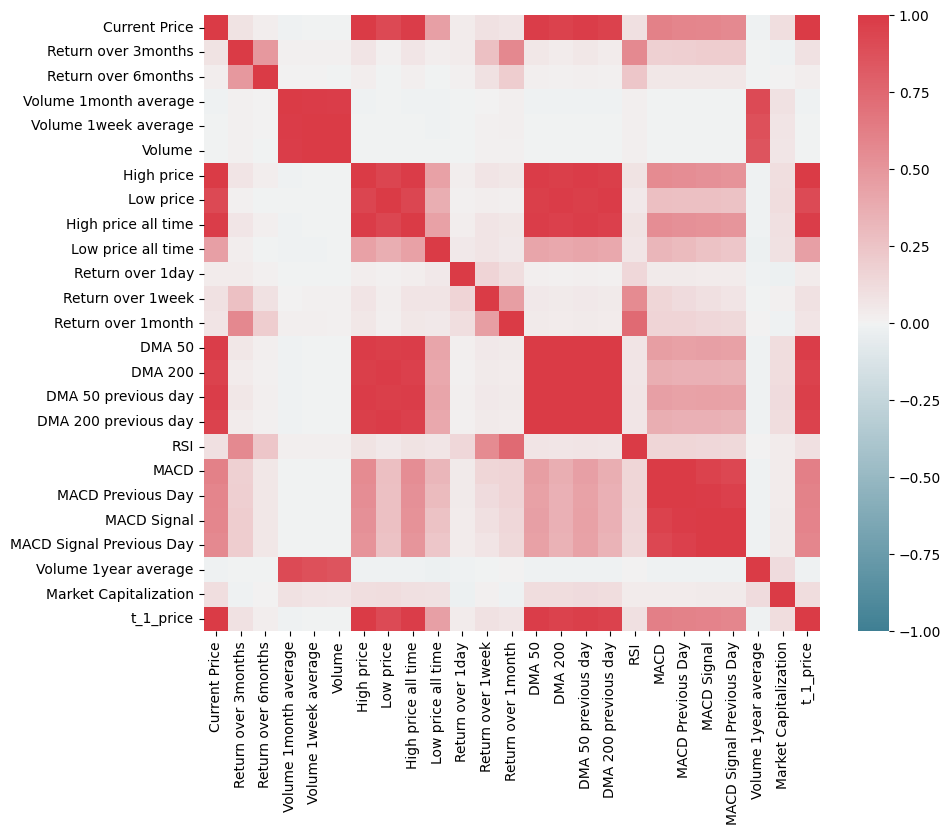

In [ ]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = new_data.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

In [ ]:
def percentage_change(row):
  return (row['t_1_price']-row['Current Price']) / row['Current Price'] * 100

In [ ]:
compare_price = new_data.apply(percentage_change, axis=1)

In [ ]:
compare_price.sort_values(inplace=True, ascending=False)

In [ ]:
compare_price.head()

,0
1691,27.382709
4113,27.159759
2496,24.491150
3110,22.689457
1552,22.622345


In [ ]:
print(compare_price.mean())

-0.9287550004501696


In [ ]:
compare_price.tail()

,0
4108,-20.593692
3418,-21.494253
700,-21.613644
2880,-23.910483
3631,-24.613003


In [ ]:
analysis_table = pd.DataFrame(columns=['Name', 'Industry', 'NSE Code', 'BSE Code', 'RSI', 'MACD', 'DMA', 'Market Cap', 'High Price Difference', 'Return 1W', 'Return 1M', 'Volume Comp', 'Current Price', 'T1 Price', 'Price to Earning', 'Price to book value', 'Industry PE', 'Change in FII holding', 'Change in promoter holding 3Years', 'Cash from Investing', 'Cash from Financing', 'Cash from Operations', 'Free Cash Flow', 'QoQ Profits', 'Intrinsic Value', 'Down from 52w high', 'Up from 52w low', 'Enterprise Value to EBIT', 'Gain/Loss', 'Investment Amount'])
og_data = pd.read_csv('/content/price_final.csv')
t1_data = pd.read_csv('/content/t1_prices.csv')
ratio1 = pd.read_csv('/content/ratios_1_final.csv')
annual = pd.read_csv('/content/Annual_P_L_2_final.csv')
cfs = pd.read_csv('/content/cash_flow_statments_final.csv')
omf = pd.read_csv('/content/other_metrics_final.csv')

In [ ]:
for index, row in og_data.iterrows():
    diff_bw_hp = (row['High price all time'] - row['Current Price']) / row['High price all time'] * 100
    if row['Volume 1month average'] > 0:
      volume_comp = (row['Volume 1week average'] - row['Volume 1month average']) / row['Volume 1month average'] * 100
    else:
      volume_comp = 0
    t1_row = t1_data[t1_data['join_key'] == row['join_key']].iloc[0]
    ratio_row = ratio1[ratio1['join_key'] == row['join_key']].iloc[0]
    annual_row = annual[annual['join_key'] == row['join_key']].iloc[0]
    cfs_row = cfs[cfs['join_key'] == row['join_key']].iloc[0]
    omf_row = omf[omf['join_key'] == row['join_key']].iloc[0]
    modified_data = {
        'Name': row['Name'],
        'Industry': row['Industry'],
        'NSE Code': row['NSE Code'],
        'BSE Code': row['BSE Code'],
        'RSI': row['RSI'],
        'MACD': row['MACD'] - row['MACD Signal'],
        'DMA': row['DMA 50'] - row['DMA 200'],
        'Market Cap': row['Market Capitalization'],
        'High Price Difference': diff_bw_hp,
        'Return 1W': row['Return over 1week'],
        'Return 1M': row['Return over 1month'],
        'Volume Comp': volume_comp,
        'Current Price': row['Current Price'],
        'T1 Price': t1_row['t_1_price'],
        'Price to Earning': ratio_row['Price to Earning'],
        'Price to book value': ratio_row['Price to book value'],
        'Industry PE': ratio_row['Industry PE'],
        'Change in FII holding': ratio_row['Change in FII holding'],
        'Change in promoter holding 3Years': annual_row['Change in promoter holding 3Years'],
        'Cash from Investing': cfs_row['Cash from investing last year'] - cfs_row['Cash from investing preceding year'],
        'Cash from Financing': cfs_row['Cash from financing last year'] - cfs_row['Cash from financing preceding year'],
        'Cash from Operations': cfs_row['Cash from operations last year'] - cfs_row['Cash from operations preceding year'],
        'Free Cash Flow': cfs_row['Free cash flow last year'] - cfs_row['Free cash flow preceding year'],
        'QoQ Profits': omf_row['QoQ Profits'],
        'Intrinsic Value': omf_row['Intrinsic Value'],
        'Down from 52w high': omf_row['Down from 52w high'],
        'Up from 52w low': omf_row['Up from 52w low'],
        'Enterprise Value to EBIT': omf_row['Enterprise Value to EBIT'],
        'Gain/Loss': (t1_row['t_1_price'] - row['Current Price']) / row['Current Price'] * 100,
    }
    modified_row_df = pd.DataFrame([modified_data])
    analysis_table = pd.concat([analysis_table, modified_row_df], ignore_index=True)


<ipython-input-179-1b7beca26ed3>:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  analysis_table = pd.concat([analysis_table, modified_row_df], ignore_index=True)


In [ ]:
analysis_table.drop(columns='Intrinsic Value', inplace=True)
analysis_table.drop(columns='Free Cash Flow', inplace=True)
analysis_table.drop(columns='Down from 52w high', inplace=True)
analysis_table.drop(columns='Enterprise Value to EBIT', inplace=True)

In [ ]:
display(analysis_table.head())

,Name,Industry,NSE Code,BSE Code,RSI,MACD,DMA,Market Cap,High Price Difference,Return 1W,...,Industry PE,Change in FII holding,Change in promoter holding 3Years,Cash from Investing,Cash from Financing,Cash from Operations,QoQ Profits,Up from 52w low,Gain/Loss,Investment Amount
0,20 Microns,Mining / Minerals / Metals,20MICRONS,533022.0,69.23,3.73,24.33,794.66,4.145739,0.18,...,19.15,0.01,0.12,-5.44,35.11,-8.76,18.78,149.89,1.873890,NaN
1,21st Cent. Mgmt.,Finance & Investments,21STCENMGM,526921.0,88.60,1.14,11.86,73.96,51.437435,8.22,...,23.18,0.00,3.62,12.99,-12.34,3.06,5.60,297.97,2.683135,NaN
2,360 ONE,Finance & Investments,360ONE,542772.0,78.12,15.77,115.47,36136.15,6.492958,15.52,...,23.18,0.74,-5.16,-2362.26,1422.19,852.40,26.29,125.06,3.010494,NaN
3,3B Blackbio,Healthcare,__NA__,532067.0,62.56,-3.76,156.29,1016.66,6.141046,-0.28,...,42.74,-0.41,2.94,-32.74,1.38,4.05,3.29,185.33,12.278599,NaN
4,3C IT Solutions,Computers - Software - Medium / Small,__NA__,544190.0,NaN,-0.39,0.72,27.09,13.892078,-11.20,...,34.11,NaN,NaN,0.45,-4.17,3.79,NaN,7.14,0.311111,NaN


In [ ]:
display(analysis_table.tail())

,Name,Industry,NSE Code,BSE Code,RSI,MACD,DMA,Market Cap,High Price Difference,Return 1W,...,Industry PE,Change in FII holding,Change in promoter holding 3Years,Cash from Investing,Cash from Financing,Cash from Operations,QoQ Profits,Up from 52w low,Gain/Loss,Investment Amount
4663,Zota Health Care,Trading,ZOTA,-1.0,58.10,-0.84,50.33,1514.68,11.472868,0.13,...,34.16,0.00,-5.51,-27.60,32.66,-3.97,-135.37,53.91,-3.521891,NaN
4664,Zuari Agro Chem.,Fertilizers,ZUARI,534742.0,65.24,2.72,7.87,957.01,67.021739,0.20,...,32.06,-0.31,0.23,-423.14,169.76,378.31,170.96,68.37,-13.109207,NaN
4665,Zuari Industries,Sugar,ZUARIIND,500780.0,66.40,7.48,62.68,1220.13,1.277108,1.11,...,16.08,0.06,1.19,633.85,-493.91,-197.65,-91.31,218.01,5.965340,NaN
4666,Zydus Lifesci.,Pharmaceuticals - Indian - Bulk Drugs & Formln,ZYDUSLIFE,532321.0,53.72,-4.27,177.04,107314.87,9.040512,-0.59,...,34.70,0.73,0.10,-2653.00,2590.00,539.10,57.75,89.22,7.308017,NaN
4667,Zydus Wellness,Food - Processing - Indian,ZYDUSWELL,531335.0,46.46,-15.26,118.53,11797.40,25.146860,-4.28,...,38.34,0.01,4.80,65.54,112.79,154.69,50000.00,30.18,1.677994,NaN


<Axes: >

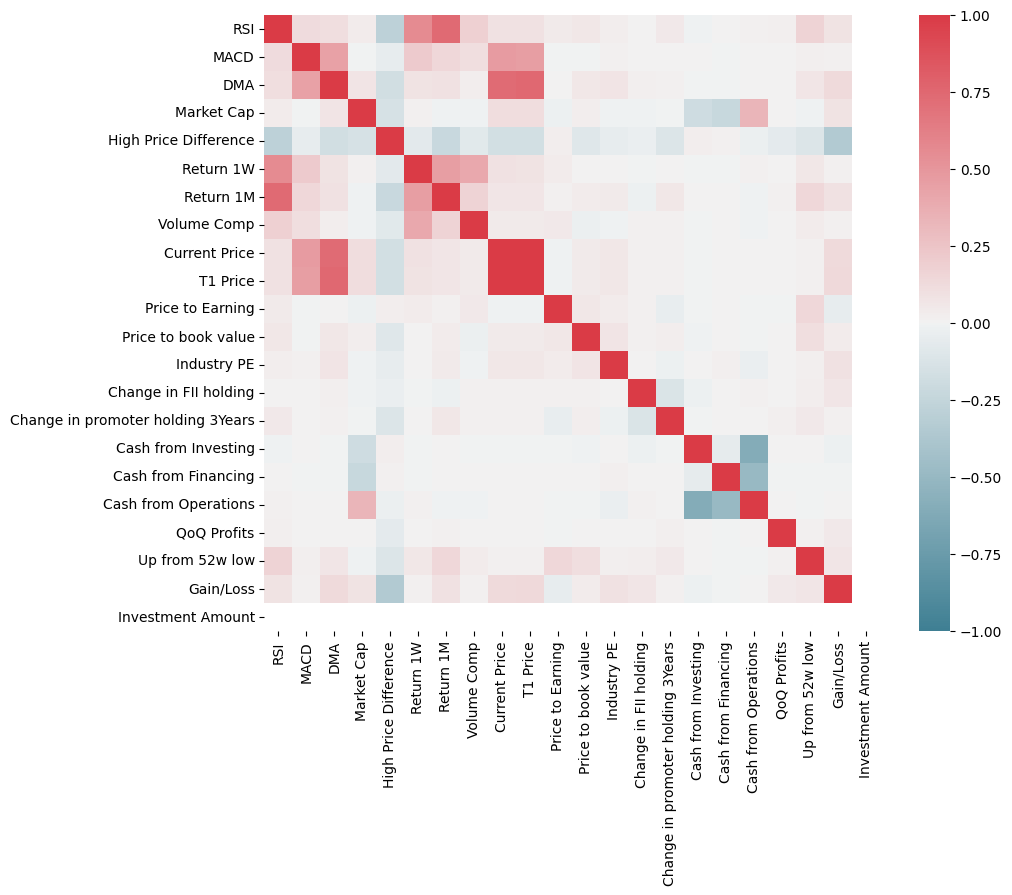

In [ ]:

f, ax = plt.subplots(figsize=(10, 8))
corr = analysis_table.iloc[:, 4:].corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

In [ ]:
analysis_table = analysis_table[analysis_table['Gain/Loss'] >= -2]

In [ ]:
average_gain_loss = analysis_table.groupby('Industry')['Gain/Loss'].mean()

average_gain_loss = average_gain_loss.sort_values(ascending=False)
average_gain_loss.head(20)


,Gain/Loss
Industry,
Air-conditioners,13.326638
Automobiles - LCVs / HCVs,11.139651
Pharmaceuticals - Multinational,10.428077
Abrasives And Grinding Wheels,9.902584
Transmisson Line Towers / Equipment,8.488468
Pumps,8.126908
Electrodes - Graphites,7.771287
Computers - Hardware,7.645253
Electrodes - Welding Equipment,7.563656


In [ ]:
average_gain_loss.tail(20)

,Gain/Loss
Industry,
Textiles - Manmade,2.008084
Tea,1.962441
Dyes And Pigments,1.929284
Paper,1.923549
Textiles - Processing,1.918141
Fasteners,1.873429
Cement - South India,1.831419
Solvent Extraction,1.813136
Textile Machinery,1.737076


In [ ]:
analysis_table.shape

(2598, 26)

In [ ]:
analysis_table = analysis_table[analysis_table['Price to Earning'] <= analysis_table['Industry PE']]

In [ ]:
analysis_table.shape

(1066, 26)

In [ ]:
analysis_table = analysis_table[analysis_table['Change in FII holding'] >= 0]

In [ ]:
analysis_table.shape

(756, 26)

In [ ]:
analysis_table = analysis_table[analysis_table['QoQ Profits'] >= 0]

In [ ]:
analysis_table.shape

(450, 26)

In [ ]:
analysis_table = analysis_table[analysis_table['Up from 52w low'] >= 100]

In [ ]:
analysis_table.shape

(155, 26)

In [ ]:
analysis_table.head(20)

,Name,Industry,NSE Code,BSE Code,RSI,MACD,DMA,Market Cap,High Price Difference,Return 1W,...,Industry PE,Change in FII holding,Change in promoter holding 3Years,Cash from Investing,Cash from Financing,Cash from Operations,QoQ Profits,Up from 52w low,Gain/Loss,Investment Amount
0,20 Microns,Mining / Minerals / Metals,20MICRONS,533022.0,69.23,3.73,24.33,794.66,4.145739,0.18,...,19.15,0.01,0.12,-5.44,35.11,-8.76,18.78,149.89,1.873890,NaN
1,21st Cent. Mgmt.,Finance & Investments,21STCENMGM,526921.0,88.60,1.14,11.86,73.96,51.437435,8.22,...,23.18,0.00,3.62,12.99,-12.34,3.06,5.60,297.97,2.683135,NaN
90,ADC India,Telecommunications - Equipment,__NA__,523411.0,81.82,60.84,333.66,965.08,8.583878,4.69,...,75.70,0.00,0.00,0.70,4.58,23.67,8.78,209.81,3.501430,NaN
100,Adit.Birla Money,Finance & Investments,BIRLAMONEY,532974.0,63.19,-0.27,27.83,935.23,9.760087,-3.62,...,17.68,0.03,-0.27,-0.34,296.45,-367.27,8.65,188.83,3.335347,NaN
190,All E Tech,Computers - Software - Medium / Small,ALLETEC,-1.0,45.64,-1.97,21.71,510.31,24.657126,-2.38,...,34.11,0.06,NaN,44.94,-45.78,2.30,3.36,138.40,10.648991,NaN
196,Allsec Tech.,Computers - Software - Medium / Small,ALLSEC,532633.0,60.35,-6.81,215.06,1839.00,2.212318,0.61,...,34.11,0.02,0.00,-18.53,-19.34,19.55,84.10,145.11,6.931300,NaN
215,Amba Enterprises,Electric Equipment,__NA__,539196.0,63.50,0.17,46.67,301.31,10.018904,-2.56,...,58.82,0.00,3.70,0.06,8.79,-6.68,26.87,276.51,-1.239496,NaN
230,Ameya Precision,Engineering,AMEYA,-1.0,70.39,2.36,19.95,91.36,12.813171,-4.62,...,40.00,0.00,NaN,0.22,-4.06,8.16,64.29,229.19,13.284072,NaN
248,Andhra Petrochem,Chemicals,__NA__,500012.0,55.87,-0.76,13.64,985.64,41.236069,-6.82,...,39.79,0.42,0.00,-74.34,-5.30,87.40,347.35,100.00,4.551724,NaN
255,ANI Integrated,Miscellaneous,AISL,-1.0,42.33,-3.55,38.47,128.84,30.165398,-11.30,...,34.07,0.00,-3.22,0.38,7.92,-8.09,15.57,173.38,1.082707,NaN


In [ ]:
# if row['RSI'] < 90 and row['MACD'] >= row['MACD Signal'] and row['Volume 1week average'] >= row['Volume 1month average'] and diff_bw_hp <= 30:
# if row['Return over 1week'] >= 0 and row['Return over 1month'] >= 0 and row['DMA 50'] >= row['DMA 200']:

In [ ]:
analysis_table = analysis_table[(analysis_table['RSI'] <= 90) & (analysis_table['MACD'] >= 0) & (analysis_table['Volume Comp'] >= 0)]

In [ ]:
analysis_table = analysis_table[analysis_table['High Price Difference'] <= 20]

In [ ]:
# analysis_table = analysis_table[(analysis_table['Return 1M'] >= -4) & (analysis_table['Return 1W'] >= -4)]

In [ ]:
analysis_table = analysis_table[analysis_table['DMA'] >= 60]

In [ ]:
analysis_table.shape

(13, 26)

In [ ]:
analysis_table.head(13)

,Name,Industry,NSE Code,BSE Code,RSI,MACD,DMA,Market Cap,High Price Difference,Return 1W,...,Industry PE,Change in FII holding,Change in promoter holding 3Years,Cash from Investing,Cash from Financing,Cash from Operations,QoQ Profits,Up from 52w low,Gain/Loss,Investment Amount
90,ADC India,Telecommunications - Equipment,__NA__,523411.0,81.82,60.84,333.66,965.08,8.583878,4.69,...,75.70,0.00,0.00,0.70,4.58,23.67,8.78,209.81,3.501430,NaN
1049,Dr Agarwal's Eye,Healthcare,__NA__,526783.0,48.77,11.21,302.03,1504.47,12.540984,-0.03,...,42.74,0.01,-2.12,0.57,-14.49,20.15,35.49,138.81,6.985005,NaN
1109,Eimco Elecon(I),Engineering,EIMCOELECO,523708.0,60.46,41.96,445.23,1444.04,5.993164,-0.13,...,43.13,0.20,0.00,2.39,-1.67,4.93,96.56,324.18,2.315546,NaN
1340,Garden Reach Sh.,Miscellaneous,GRSE,542011.0,74.68,46.92,399.07,26307.49,0.560727,19.74,...,74.96,0.40,0.00,2721.99,-577.85,-2157.12,26.46,309.60,12.049378,NaN
1538,Gulf Oil Lubric.,Chemicals,GULFOILLUB,538567.0,76.20,26.57,157.68,6276.40,1.634541,17.34,...,39.79,2.10,-0.19,-88.26,-36.31,74.82,5.81,176.44,1.399122,NaN
1625,Hind Rectifiers,Electronics - Components,HIRECT,504036.0,46.79,0.04,99.57,1173.07,16.929612,-0.07,...,74.31,0.04,1.80,9.83,-35.43,25.72,236.84,151.56,3.741417,NaN
1775,Indl.& Prud.Inv.,Finance & Investments,__NA__,501298.0,75.22,113.06,760.74,1139.56,6.990740,12.21,...,23.18,0.00,0.00,-1.56,-1.68,3.04,1.51,213.08,7.504412,NaN
1960,Jindal Photo,Finance & Investments,JINDALPHOT,532624.0,79.76,20.16,86.03,901.06,9.370485,26.81,...,23.18,0.00,1.48,-0.11,0.00,0.13,6.77,175.89,-0.373491,NaN
1990,JSL Industries,Electric Equipment,__NA__,504080.0,87.01,81.75,346.19,251.91,1.997945,21.54,...,58.82,0.00,0.00,0.29,0.56,-0.85,668.97,462.81,11.919385,NaN
2855,Orient Beverages,Miscellaneous,__NA__,507690.0,69.34,4.41,63.04,85.53,9.476452,8.06,...,34.07,0.00,4.59,11.51,-19.98,9.15,106.92,242.52,1.007703,NaN


In [ ]:
analysis_table['Investment Amount'] = analysis_table.apply(lambda row: abs(row['Gain/Loss']) / 78.7830088088891 * 1000000, axis=1)

In [ ]:
analysis_table.head(13)

,Name,Industry,NSE Code,BSE Code,RSI,MACD,DMA,Market Cap,High Price Difference,Return 1W,...,Industry PE,Change in FII holding,Change in promoter holding 3Years,Cash from Investing,Cash from Financing,Cash from Operations,QoQ Profits,Up from 52w low,Gain/Loss,Investment Amount
90,ADC India,Telecommunications - Equipment,__NA__,523411.0,81.82,60.84,333.66,965.08,8.583878,4.69,...,75.70,0.00,0.00,0.70,4.58,23.67,8.78,209.81,3.501430,44443.973215
1049,Dr Agarwal's Eye,Healthcare,__NA__,526783.0,48.77,11.21,302.03,1504.47,12.540984,-0.03,...,42.74,0.01,-2.12,0.57,-14.49,20.15,35.49,138.81,6.985005,88661.308976
1109,Eimco Elecon(I),Engineering,EIMCOELECO,523708.0,60.46,41.96,445.23,1444.04,5.993164,-0.13,...,43.13,0.20,0.00,2.39,-1.67,4.93,96.56,324.18,2.315546,29391.432959
1340,Garden Reach Sh.,Miscellaneous,GRSE,542011.0,74.68,46.92,399.07,26307.49,0.560727,19.74,...,74.96,0.40,0.00,2721.99,-577.85,-2157.12,26.46,309.60,12.049378,152943.872005
1538,Gulf Oil Lubric.,Chemicals,GULFOILLUB,538567.0,76.20,26.57,157.68,6276.40,1.634541,17.34,...,39.79,2.10,-0.19,-88.26,-36.31,74.82,5.81,176.44,1.399122,17759.186157
1625,Hind Rectifiers,Electronics - Components,HIRECT,504036.0,46.79,0.04,99.57,1173.07,16.929612,-0.07,...,74.31,0.04,1.80,9.83,-35.43,25.72,236.84,151.56,3.741417,47490.152373
1775,Indl.& Prud.Inv.,Finance & Investments,__NA__,501298.0,75.22,113.06,760.74,1139.56,6.990740,12.21,...,23.18,0.00,0.00,-1.56,-1.68,3.04,1.51,213.08,7.504412,95254.190950
1960,Jindal Photo,Finance & Investments,JINDALPHOT,532624.0,79.76,20.16,86.03,901.06,9.370485,26.81,...,23.18,0.00,1.48,-0.11,0.00,0.13,6.77,175.89,-0.373491,4740.758670
1990,JSL Industries,Electric Equipment,__NA__,504080.0,87.01,81.75,346.19,251.91,1.997945,21.54,...,58.82,0.00,0.00,0.29,0.56,-0.85,668.97,462.81,11.919385,151293.852346
2855,Orient Beverages,Miscellaneous,__NA__,507690.0,69.34,4.41,63.04,85.53,9.476452,8.06,...,34.07,0.00,4.59,11.51,-19.98,9.15,106.92,242.52,1.007703,12790.867067


In [ ]:
analysis_table['Investment Amount'].sum()

999999.9999999999